<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h1> <center> Gebaseerd op een cursus van:</center> </h1> 
    </font>
    <a href="https://www.aiopschool.be/chatbot/"> 
        <img src="../_afbeeldingen/bannerugentdwengo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>
    </a>
</div>

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h1>1. Dataset opstellen</h1> 
    </font>
</div>

<div style="background-color:#013220">
Er zijn twee redenen om het YOLO-model uit te breiden:
  <ul> 
    <li>Een nieuw object toevoegen.</li> 
    <li>De detectie-accuraatheid van een bestaand object verhogen voor jouw situatie.</li>
  </ul>
</div>

Een eigen dataset opstellen kan door zelf veel verschillende foto's te nemen... Maar honderden (laat staan duizenden) foto's zelf maken is veel werk. Je kan ook een kleiner aantal foto's maken en deze manipuleren.  Door de afbeelding te transformeren, bijvoorbeeld door uitrekking, bijsnijden of het gebruik van een filter, ontstaan er heel wat nieuwe andere inputafbeeldingen die het model kan gebruiken. Onderstaande afbeelding toont dit proces. In deze notebook verdiep je je in deze materie. <br><br>
<figure>
  <img src="../_afbeeldingen/filters.jpg" alt="Trulli" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:50%"/>
    <br>
</figure>


<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h1>2. Modules installeren en importeren</h1> 
    </font>
</div>

In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import os
from matplotlib import pyplot as plt

Met de code hieronder zal je een afbeelding weergeven. Deze (originele) afbeelding zal je hierna op verschillende manieren bewerken.

In [3]:
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

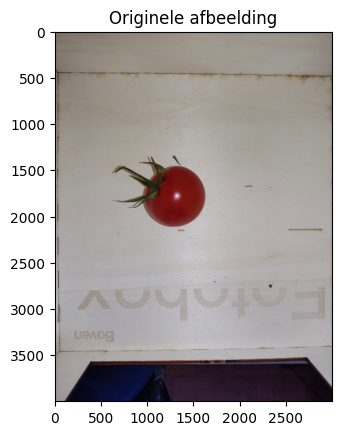

(4000, 3000, 3)


In [4]:
# Let op het pad!
tomaat = cv2.imread("../_afbeeldingen/tomaat.jpg")
plt_imshow("Originele afbeelding", tomaat)

print(tomaat.shape)

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h2>3. Afbeelding manipuleren</h2> 
    </font>
</div>

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h3>3.1 Afbeelding roteren</h3> 
    </font>
</div>

Je zou misschien verwachten dat `machine learning` (en dus ook `deep learning` ) gemakkelijk twee identieke afbeeldingen kan onderscheiden. Ook al is een gedraaid ten opzichte van de andere. Dit is echter niet zo! Herinner je dat een computer een afbeelding ziet als een hoop pixels. Door een foto bijvoorbeeld te roteren, verandert de volgorde van de pixels. De computer ziet dus als het ware een compleet nieuwe foto.

Het model moet tomaten herkennen die in alle hoeken geroteerd zijn. Dit aangezien op een transportband de tomaten in alle richtingen kunnen liggen. Het is mogelijk om een hoop foto's te nemen van een tomaat onder verschillende hoeken. Via cv2 is dit echter heel wat makkelijker.

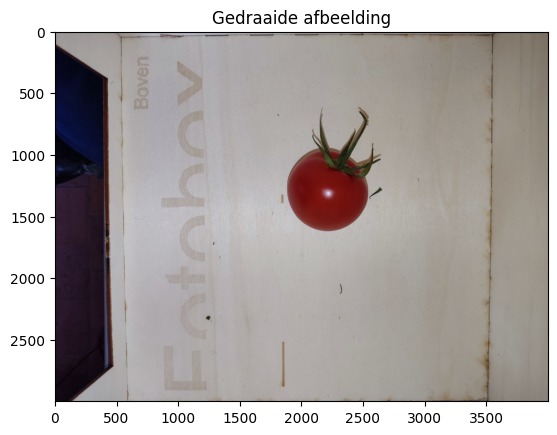

In [5]:
tomaat_rot = cv2.rotate(tomaat, cv2.ROTATE_90_CLOCKWISE)
plt_imshow("Gedraaide afbeelding", tomaat_rot)

### Oefen mee 3.1
Roteer nu zelf de foto 180 graden.

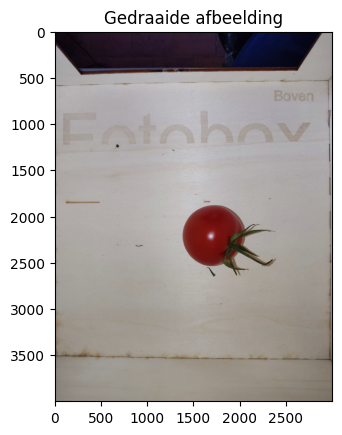

In [7]:
# Roteer tomaat 180°
tomaat_rot2 = cv2.rotate(tomaat, cv2.ROTATE_180)
plt_imshow("Gedraaide afbeelding", tomaat_rot2)

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h3>3.2 Afbeelding spiegelen</h3> 
    </font>
</div>

Net zoals geroteerde foto's door `deep learning` niet herkend worden. Zal het spiegelen van foto's ook een **"compleet nieuwe"** afbeelding geven voor het algoritme.

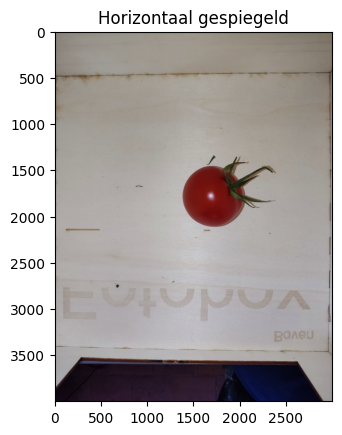

In [8]:
# 1 = horizontaal 
flippedtomaat = cv2.flip(tomaat, 1)
plt_imshow("Horizontaal gespiegeld", flippedtomaat)

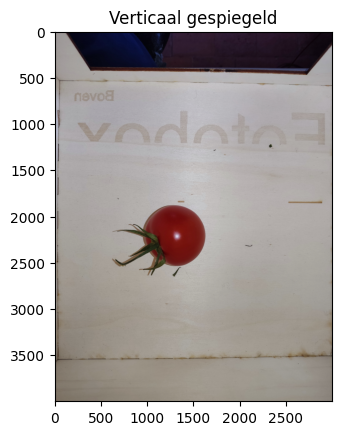

In [9]:
# 0 = verticaal
flippedtomaat2 = cv2.flip(tomaat, 0)
plt_imshow("Verticaal gespiegeld", flippedtomaat2)

### Oefen mee 3.2
spiegel de foto zowel horizontaal als verticaal.

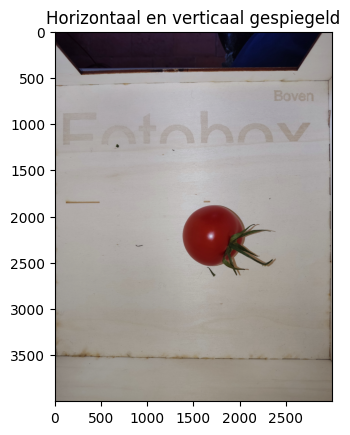

In [10]:
# Spiegel verticaal en horizontaal (zoek zelf op hoe)
flippedtomaat3 = cv2.flip(tomaat, -1)
plt_imshow("Horizontaal en verticaal gespiegeld", flippedtomaat3)

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h3>3.3 Afbeelding bijsnijden</h3> 
    </font>
</div>

Ook het bijsnijden van de afbeelding heeft een effect. Zo leert het model dat de afbeelding niet altijd mooi in het midden ligt of volledig zichtbaar is. Bijvoorbeeld wanneer de tomaten nog maar net op de transportband liggen.

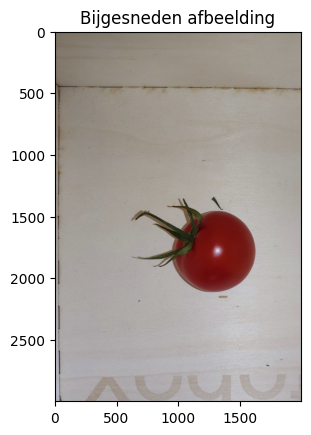

In [11]:
# Bijsnijden van afbeelding
# neemt foto van y tot y+h en x tot x+w
y = 0
x = 0
h = 3000
w = 2000
tomaat_crop = tomaat[y:y+h, x:x+w]
plt_imshow("Bijgesneden afbeelding", tomaat_crop)

### Oefen mee 3.3
- Deze transformatie kan ook negatieve gevolgen hebben voor de training van het model. Hoe komt dit?

**Antwoord:**

- Schrijf een stukje code dat dit probleem uitlegt met behulp van de foto *tomaat*: 

In [ ]:
# Probleem met bijsnijden (VUL AAN)

<div id=filters style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h3>3.4 Filters</h3> 
    </font>
</div>

Na deze basismethodes kan je ook filters aanbrengen. Dit is net hetzelfde als bij Instagram: een foto kan er heel anders uitzien met een andere filter. Er zijn filters beschikbaar in `cv2`. Maar je kan ook je eigen opstellen (zie **Filter 4**).

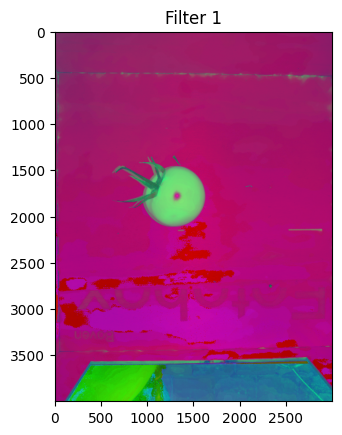

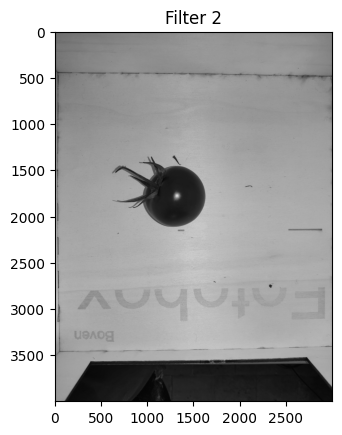

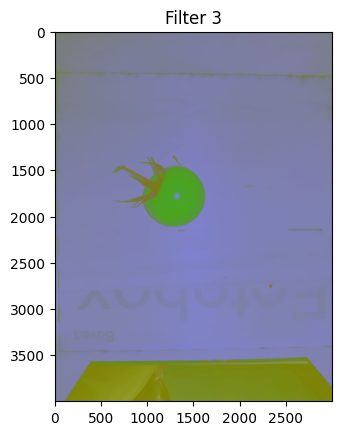

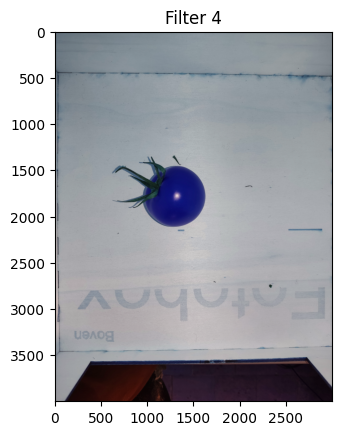

In [12]:
# Zet foto om naar HSV-domein, blijf wel RGB-waarden gebruiken.
tomaat_filter1 = cv2.cvtColor(tomaat, cv2.COLOR_RGB2HSV)  
# Zet foto om naar grijs-domein, op basis van gemiddelde RGB-waarde.
tomaat_filter2 = cv2.cvtColor(tomaat, cv2.COLOR_RGB2GRAY)
# Zet foto om naar LAB-domein, blijf wel RGB-waarden gebruiken.   
tomaat_filter3 = cv2.cvtColor(tomaat, cv2.COLOR_RGB2LAB)
plt_imshow("Filter 1", tomaat_filter1) 
plt_imshow("Filter 2", tomaat_filter2)
plt_imshow("Filter 3", tomaat_filter3)

b, g, r = cv2.split(tomaat)
tomaat_filter4 = cv2.merge([r, g, b]) # Wissel de blauw en rood waarden van de foto om.
plt_imshow("Filter 4", tomaat_filter4)

### Oefen mee 3.4
Waarom zou het gebruik van filters interessant kunnen zijn bij de trainingsset van het algoritme?

**Antwoord:** Zodat het algoritme ook foto's met filter kan herkennen

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h3>3.5 Afbeelding wazig maken</h3> 
    </font>
</div>

Om ervoor te zorgen dat het algoritme ook in niet ideale omstandigheden werkt, kan je een filter toepassen die de afbeelding wazig maakt. Zo is het mogelijk dat een input afbeelding zonder optimaal beeld toch gedetecteerd wordt. Er zijn verschillende redenen waarom dit handig is.

 - Een transportband heeft een bepaalde snelheid. Doordat dus ook de tomaten aan een bepaalde snelheid voor de camera passeren, kan dit tot wazige afbeeldingen leiden.
 - Ook als de transportband in een andere ruimte wordt geplaatst waar de lichtinval een beetje anders is, moet het algoritme zijn werk kunnen doen. 
 
Net als filters, bezit `cv2` een aantal manieren om afbeeldingen wazig te maken (dit zijn eigenlijk ook een soort filters).

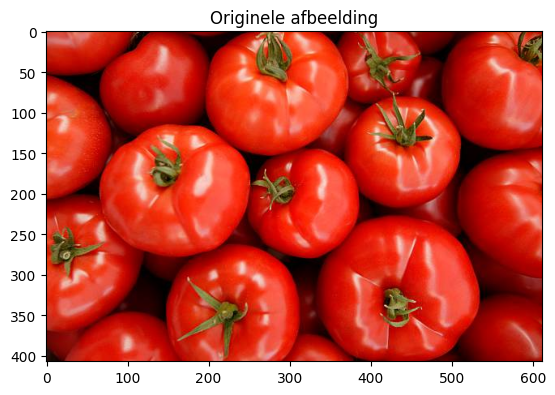

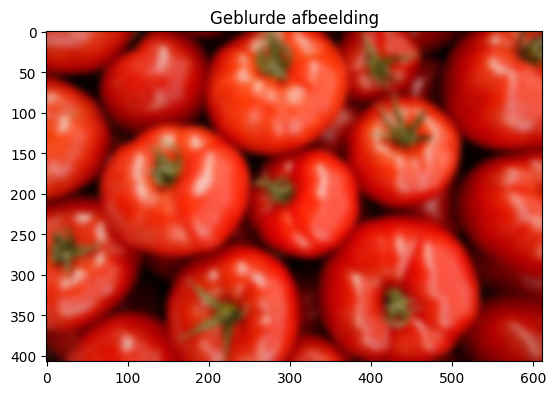

In [13]:
tomaten = cv2.imread("../_afbeeldingen/tomaten.jpg")
plt_imshow("Originele afbeelding", tomaten)

tomaten_wazig = cv2.GaussianBlur(tomaten, (35,35), cv2.BORDER_DEFAULT)
plt_imshow("Geblurde afbeelding", tomaten_wazig)

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h2>4. Afbeelding manipuleren en opslaan</h2> 
    </font>
</div>

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h3>4.1 Afbeelding opslaan</h3> 
    </font>
</div>

Na een afbeelding te manipuleren, willen we deze natuurlijk ook opslaan. Dit kan via de `cv2` functie `imwrite`.

In [14]:
# Inlezen afbeelding
tomaat = cv2.imread("../_afbeeldingen/tomaat.jpg")

# Roteren afbeelding
tomaat_rot2 = cv2.rotate(tomaat, cv2.ROTATE_180)

# Opslaan van geroteerde afbeelding (Geef een unieke naam!)
cv2.imwrite(filename='tomaat_rot180.jpg', img=tomaat_rot2)

True

De foto **tomaat_rot180.jpg** is nu aangemaakt op de locatie van de notebook. Je kan het pad (van de parameter **filename**) echter uitbreiden om deze op een andere locatie te zetten. Dit werkt hetzelfde als CSV- en JSON-bestanden. 

### Oefen mee 4.1
Zorg ervoor dat de afbeelding `tomaat_rot180.jpg` wordt aangemaakt in de map **_afbeeldingen**.

In [15]:
# Inlezen afbeelding
tomaat = cv2.imread("../_afbeeldingen/tomaat.jpg")
# Roteren afbeelding
tomaat_rot2 = cv2.rotate(tomaat, cv2.ROTATE_180)

# Opslaan van geroteerde afbeelding (Geef een unieke naam!)
pad = r"" # VUL AAN (gebruik r"" bij ingeven absoluut pad)
cv2.imwrite(filename=f'{pad}/tomaat_rot180.jpg', img=tomaat_rot2)

False

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h3>4.2 Alle afbeeldingen in een folder overlopen</h3> 
    </font>
</div>

We willen liefst alle bestanden in een keer overlopen, manipuleren en opslaan. Alle JPG's en PNG's uit een folder halen kan als volgt.

In [16]:
pad = r"../_afbeeldingen/" # Locatie met te bewerken afbeeldingen
folder = os.listdir(pad) 
for index, bestand in enumerate(folder):
    if (".png" in bestand) or (".jpg" in bestand): # We werken enkel met png- of jpg-bestanden.
        print(f"Bestand {index+1}: {bestand}")

Bestand 1: AI_sentiment.png
Bestand 2: bannerugentdwengo.png
Bestand 3: beeldcomputer.jpg
Bestand 4: celtoevoegen.jpg
Bestand 5: corgibrood.png
Bestand 6: download.png
Bestand 7: driehoek.jpg
Bestand 8: droidcam.jpg
Bestand 9: filters.jpg
Bestand 10: hondcake.png
Bestand 11: hondkat.png
Bestand 12: hondkip.jpg
Bestand 13: hondmop.jpg
Bestand 14: interpreter.jpg
Bestand 15: kat.jpg
Bestand 16: katten.png
Bestand 17: kernel.png
Bestand 18: knipcopypaste.jpg
Bestand 19: ML_sentiment.png
Bestand 20: run.jpg
Bestand 21: schaal.png
Bestand 22: sentiment.png
Bestand 23: slotchocoladekoek.jpg
Bestand 24: stopresetrestart.jpg
Bestand 26: tomaat.jpg
Bestand 27: tomaat_rot180.jpg
Bestand 28: tomaten.jpg
Bestand 29: vormen.png
Bestand 30: watcomputerziet.png
Bestand 31: wazigeafbeelding1.jpg
Bestand 32: wazigeafbeelding2.jpg
Bestand 33: wolfhusky.jpg
Bestand 34: yolo.png


### Oefen mee 4.2

Open de map **verwerken**. Erin zitten 3 afbeeldingen (vormen.png, katten.png, schaal.png):
- Overloop deze afbeeldingen door gebruik te maken van **os.listdir**<br>
(print eerst de namen om te controleren dat je op de correcte plaats zit);
- Verwerk de drie afbeeldingen op een aantal manieren:
    1. Roteer iedere afbeelding met 270°.
    2. Spiegel iedere afbeelding verticaal.
    3. Maak iedere afbeelding wazig.
- Sla iedere verwerkte afbeelding op in een bestand. Op deze locatie als de originele foto. Gebruik logische namen zoals:
  - vormen_rot.png
  - vormen_spiegel.png
  - vormen_filter.png

In [18]:
pad = r"C:\Users\SWPI190304\Pictures\New folder" # pad naar de map verwerken
folder = os.listdir(pad) # Alle bestanden in de map
for index, bestand in enumerate(folder):
    # Sla bestanden over die geen PNG-afbeeldingen zijn
    if (".jpg" not in bestand):
        continue
    # Bepaal naam zonder extensie + Inladen in Python
    naam = bestand.replace(".jpg","")
    afbeelding = cv2.imread(f'{pad}/{bestand}')

    # Roteer afbeelding en sla op
    foto_rot = cv2.rotate(afbeelding, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(filename=f'{pad}/{naam}_rot.jpg', img=foto_rot)

    # spiegel
    foto_sp = cv2.flip(afbeelding, 1)
    cv2.imwrite(filename=f'{pad}/{naam}_sp.jpg', img=foto_sp)

    # filter
    foto_zw = cv2.cvtColor(afbeelding, cv2.COLOR_RGB2GRAY)
    cv2.imwrite(filename=f'{pad}/{naam}_zw.jpg', img=foto_zw)

Als je dit correct doet, moet de map nu 12 afbeelding bevatten. Je kan deze code (na licht aanpassen) ook gebruiken om de foto's van het YOLO-model te manipuleren.

<div style="background-color:#8B0000"> 
De naam van verwerkte afbeelding is best gebaseerd op de naam van het originele bestand. Als de originele afbeelding "hond" heet, dan noem je de geroteerde dus "hond_rot". 
</div>

  <a href="https://www.aiopschool.be/dwengo/"> 
        <img src="../_afbeeldingen/bannerugentdwengo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>
    </a>

Deze Notebook is gebaseerd op: Notebook AI in de landbouw, zie <a href="http://www.aiopschool.be">AI Op School</a>, van M. Benoit, F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 